In [1]:
import tensorflow_datasets as tfds

In [3]:
# ds = tfds.load('stanford_online_products', split=['train','test'], shuffle_files=True,download=True,as_supervised=True)
ds = tfds.load('imagewang', split=['train','validation'], shuffle_files=True,download=True,as_supervised=True)

In [8]:
train , valid = ds
dir(train)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for

In [14]:
builder = tfds.builder('imagewang')
print(builder)
ds = builder.as_dataset(split='train', shuffle_files=True)

In [18]:
ds = ds.take(1)

In [28]:
for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

['image', 'label']
(375, 500, 3) tf.Tensor(10, shape=(), dtype=int64)


In [29]:
import numpy as np
import matplotlib.pyplot as plt

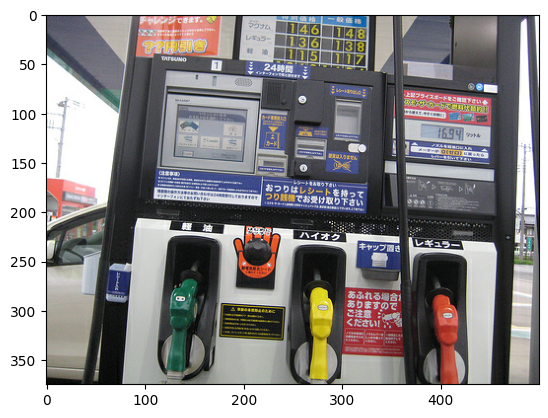

In [30]:
plt.imshow(np.array(image))

uint8 (334, 500, 3)


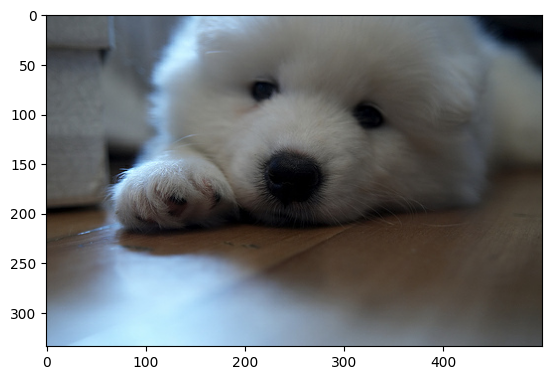

In [58]:
ex = iter(ds)
res = np.array(next(ex)["image"])
print(res.dtype,res.shape)
plt.imshow(res)

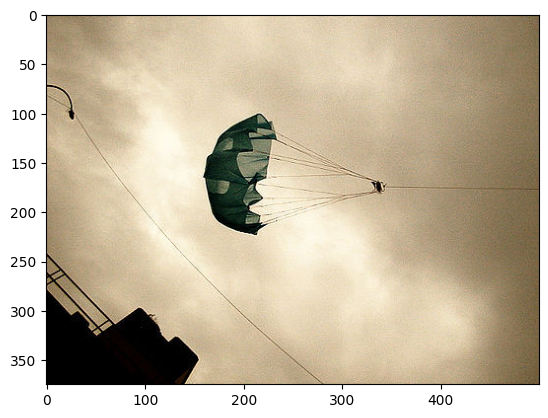

In [57]:
plt.imshow(res)